### Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 101s 9us/step


In [3]:

len(X_train)

60000

In [5]:

len(X_test)

10000

In [6]:

X_train[0].shape

(28, 28)

In [7]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

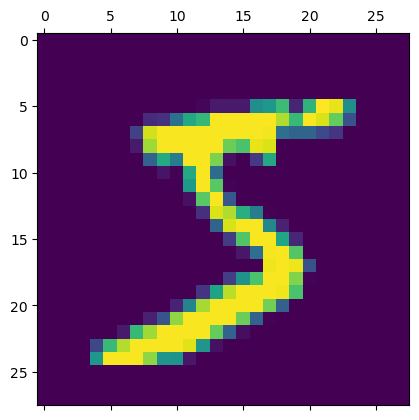

In [8]:
plt.matshow(X_train[0])

In [9]:

y_train[0]


5

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:

X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [14]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:

X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

### very simple neural network with no hidden layers

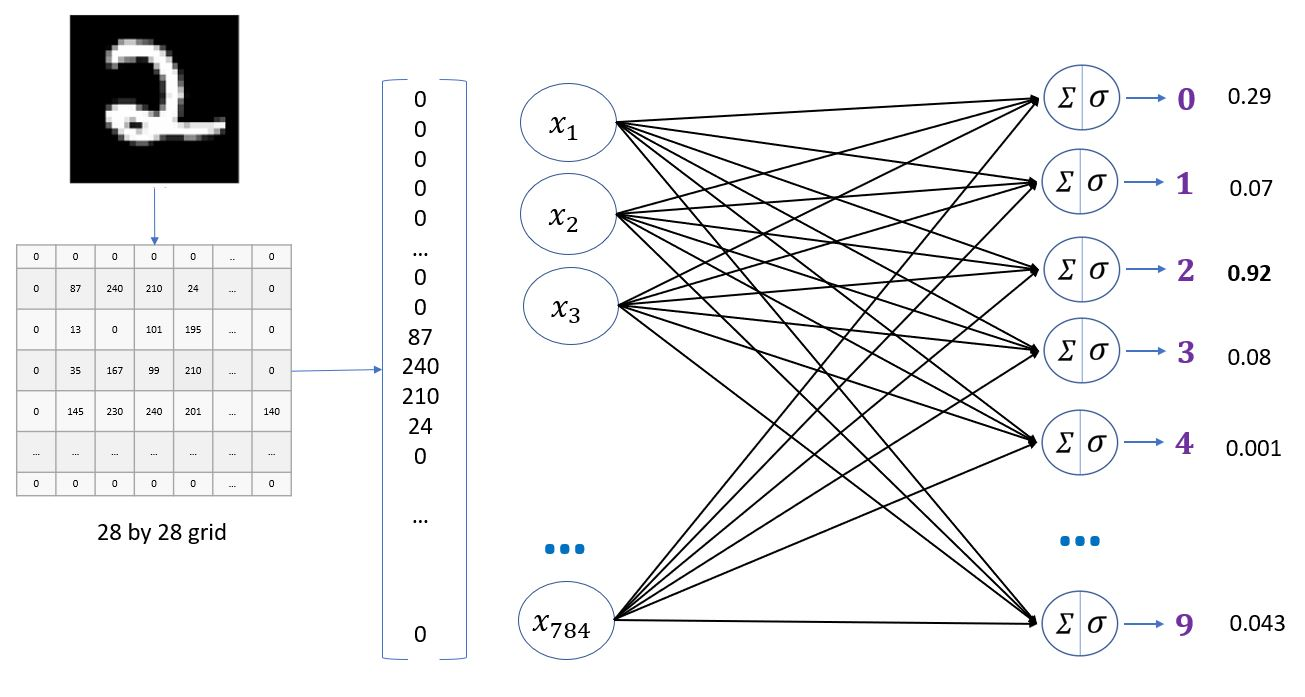

In [18]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 2.3012 - accuracy: 0.1112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3002 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2995 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2987 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2980 - accuracy: 0.1124


In [19]:

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2974 - accuracy: 0.1135


[2.2973577976226807, 0.11349999904632568]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([0.49266726, 0.5280612 , 0.49596936, 0.5076496 , 0.494026  ,
       0.47919187, 0.4973206 , 0.51063144, 0.49074832, 0.49490428],
      dtype=float32)

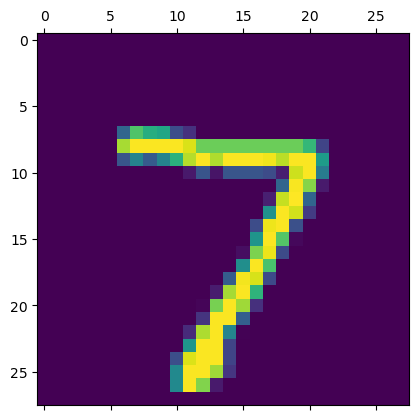

In [21]:

plt.matshow(X_test[0])

In [22]:

np.argmax(y_predicted[0])

1

In [24]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[1, 1, 1, 1, 1]

In [26]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1032,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  892,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  958,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1028,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  974,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    0,    0]])>

Text(95.72222222222221, 0.5, 'Truth')

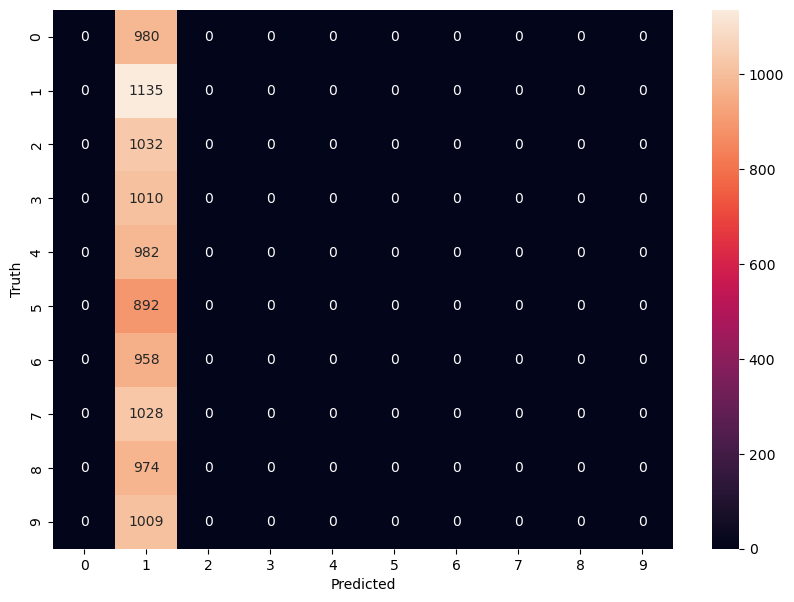

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## using hidden layers

In [28]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3014 - accuracy: 0.1120
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3009 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2998 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2970 - accuracy: 0.1126
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2901 - accuracy: 0.1280


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

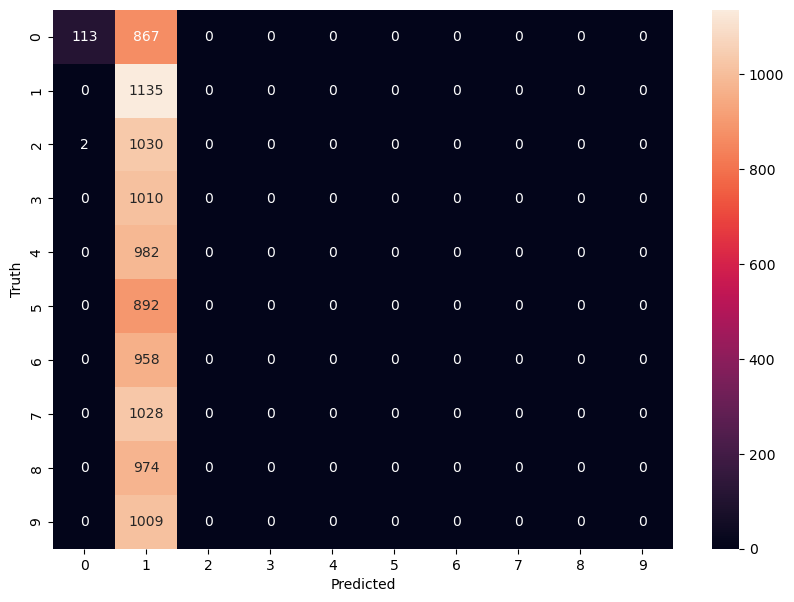

In [29]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [30]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3014 - accuracy: 0.1116
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3011 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3006 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2990 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2952 - accuracy: 0.1136
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2883 - accuracy: 0.1345
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2775 - accuracy: 0.1661
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2626 - accuracy: 0.1934
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2440 - accuracy: 0.2143
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.222

In [31]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2093 - accuracy: 0.2410


[2.209289312362671, 0.2409999966621399]